In [5]:
import pandas
import configparser
import psycopg2

In [6]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [7]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [8]:
sql = "select * from student"

In [30]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s4@jmu.edu,s4,ISAT
3,s3@jmu.edu,s3,ISAT
4,5@jmu.edu,s5,GS


In [12]:
sql = """
select professor.p_name,course.c_name 
from professor
inner join course
on professor.p_email = course.p_email
"""

In [13]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p1,postgresql
1,p2,mongodb
2,p1,twitter


In [15]:
sql = """
select count(*) as num_student, c_number
from enroll
group by c_number
"""

<AxesSubplot:xlabel='c_number'>

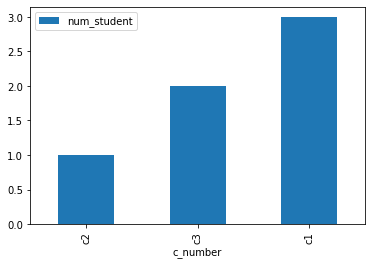

In [18]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='num_student')

In [22]:
sql = """
select professor.p_name,count(*) as num_course
from professor
inner join course
on professor.p_email = course.p_email
group by professor.p_name

"""

<AxesSubplot:xlabel='p_name'>

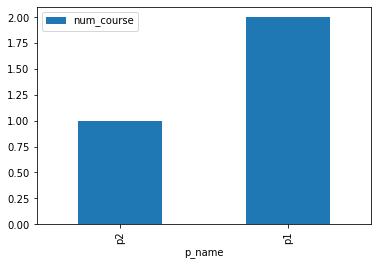

In [23]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_course')

In [24]:
sql = """
insert into student(s_email,s_name,major)
values('{}','{}','{}')
""".format('5@jmu.edu','s5','GS')

print(sql)


insert into student(s_email,s_name,major)
values('5@jmu.edu','s5','GS')



In [9]:
cur=conn.cursor()

In [10]:
cur.execute(sql)

In [28]:
conn.commit()

In [11]:
df=pandas.read_sql_query('select * from student', conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s4@jmu.edu,s4,ISAT
3,s3@jmu.edu,s3,ISAT
4,5@jmu.edu,s5,GS


In [17]:
sql = """
insert into professor (p_email,p_name,office)
values('{}','{}','{}')
""".format('p4@jmu.edu','p4','o4')

In [21]:
cur.execute(sql)

In [23]:
conn.commit()

In [24]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p2@jmu.edu,p2,o2
2,p4@jmu.edu,p4,o4


In [25]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c3,twitter,r1,p1@jmu.edu


In [44]:
sql = """
insert into course (p_email,c_name,c_number,room)
values('{}','{}','{}','{}')
""".format('p4@jmu.edu','linkedin','c5','r2')

In [45]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(c5) already exists.


In [33]:
conn.commit()

In [34]:
df = pandas.read_sql_query('select * from course',conn)
df[:]


,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c3,twitter,r1,p1@jmu.edu
3,linkedin,c5,r2,p4@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [48]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c3,twitter,r1,p1@jmu.edu
3,linkedin,c5,r2,p4@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [49]:
sql = """
update course
set p_email = '{}'
where p_email = '{}'
""".format('p4@jmu.edu','p2@jmu.edu')

In [50]:
cur.execute(sql)

In [51]:
conn.commit()

In [52]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c3,twitter,r1,p1@jmu.edu
2,linkedin,c5,r2,p4@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [53]:
sql = """
delete from professor
where p_email = '{}'
""".format('p2@jmu.edu')

In [54]:
cur.execute(sql)

In [55]:
conn.commit()

In [56]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p4@jmu.edu,p4,o4


In [57]:
cur.close()
conn.close()